# Dataiku Data Scientist Technical Assessment

Some Definitions:

* **Total person income**: Total income made in a year, including salaries, wages, bonuses, capital gains and interest income
* **Adjusted gross income**: Total taxable income after deductions, e.g. interest on student loans, some medical expenses

## 0. Initialisation

In [1]:
'------------Import Modules------------'
import warnings
warnings.filterwarnings('ignore')

# DS Modules
import random
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import seaborn as sns

# Statistical Tests
from scipy.stats import normaltest, ttest_ind, chi2_contingency, chi2

# Modelling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# import built functions for assessment
from dataikufunctions import *

In [2]:
# Set up notebook parameters
%matplotlib inline
pd.set_option('display.max_columns', None)
output_notebook() # outputs bokeh plots directly in notebook

Loading BokehJS ...

In [3]:
# Set up paths:
census_train_path = "..\\data\\census_income_learn.csv"
census_test_path = "..\\data\\census_income_test.csv"

# Set configuration parameters
random_seed = 42
random.seed = random_seed

In [4]:
# Importing datasets (train and test)
df = pd.read_csv(census_train_path, names=values)
df_test = pd.read_csv(census_test_path, names=values)

In [5]:
# Quick print of a couple of rows of the dataset
df.head(2)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,race,hispanic Origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income classification
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [6]:
# numerical and categorical features are separated based on information in the same metadata file:
numerical_features = ['age', 'wage per hour', 'capital gains',
                      'capital losses', 'dividends from stocks',
                      'instance weight', 'num persons worked for employer',
                      'weeks worked in year']

categorical_features = [cols for cols in df.columns if cols not in numerical_features]

Note: Features that are not in data (but in metadata file):
    * 'FEDTAX': 'federal income tax liability'
    * 'PEARNVAL': 'total person earnings'
    * 'PTOTVAL': 'total person income'
    * 'TAXINC': 'taxable income amount'


# 1. Exploratory Data Analysis

## 1.1 Univariate Analysis

With each univariate analysis of continuous features, we demonstrate:
* Summary statistics
* Histogram of distribution of feature for sample
* Test for normality using the combined D'Agostino / Pearson test


##### Normality Test:
* Null hypothesis: data is drawn from a normal distribution

,age,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,weeks worked in year
count,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00
mean,34.00,55.00,435.00,37.00,198.00,1740.00,2.00,23.00
std,22.00,275.00,4698.00,272.00,1984.00,994.00,2.00,24.00
min,0.00,0.00,0.00,0.00,0.00,38.00,0.00,0.00
25%,15.00,0.00,0.00,0.00,0.00,1062.00,0.00,0.00
50%,33.00,0.00,0.00,0.00,0.00,1618.00,1.00,8.00
75%,50.00,0.00,0.00,0.00,0.00,2189.00,4.00,52.00
max,90.00,9999.00,99999.00,4608.00,99999.00,18656.00,6.00,52.00
median,33.00,0.00,0.00,0.00,0.00,1618.00,1.00,8.00
skew,0.37,8.94,18.99,7.63,27.79,1.43,0.75,0.21


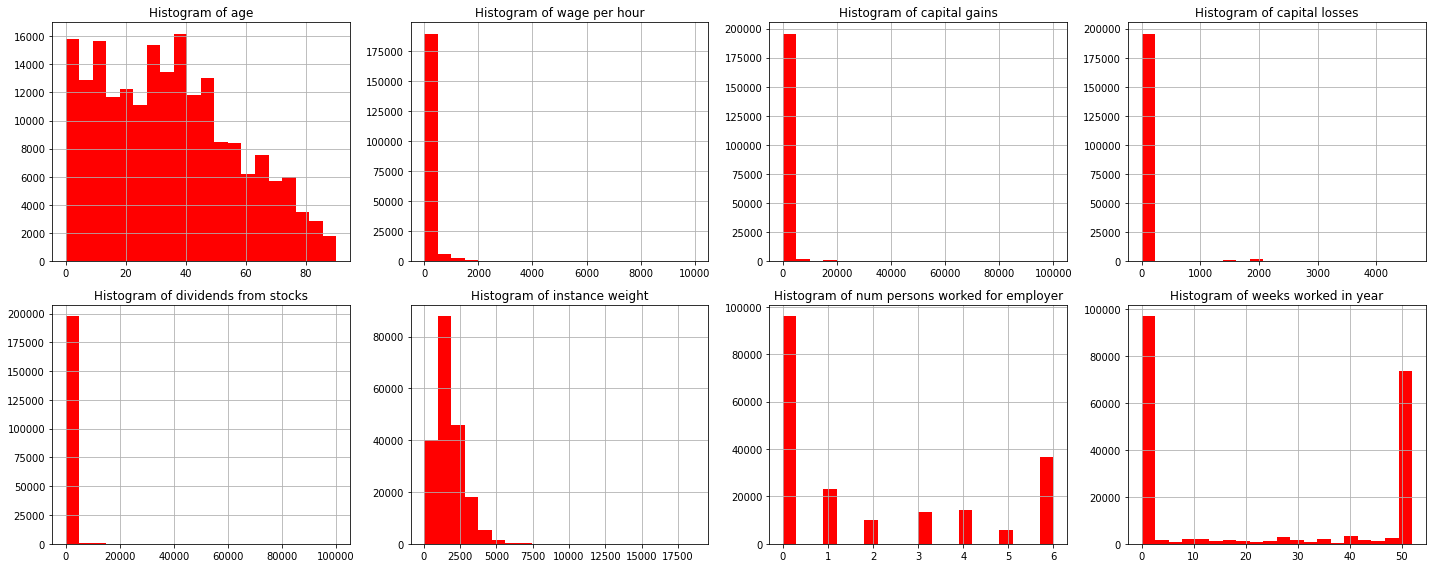

In [7]:
# Continuous variables
univariateContinuous(df, numerical_features)

### Numerical Features: Key observations:


#### **age**:
* Mean = 34yrs, std = 22yrs
* Min / max ages are 0 and 90 respectively
* **Right skew** in sample (skew = 0.37) i.e. skewed towards younger ages. A population spread like this is ordinary, another reason why is that the sample if from a noninstitutional population which also excludes those who are in care homes. This needs to be factored into any model that assumes no skew (e.g. using a logarithmic transform)
* From info: 22,000 children aged 0-14 included

#### **wage per hour**, **capital gains**, **capital losses**, **dividends from stocks**
* All of these features share similar shape in that median = 0, mean is small and have large tail of values that drop off (as seen by **large positive kurtosis value**). Shown that either value is very small (close to zero) or very large (99k)

#### **instance weight**
* Mean = 1,740, std = 994
* Right skew (skew = 1.43) since mean > median

#### **num persons worked for employer**
* Mean = 1.96, std = 2.35
* Although this has been marked in the metadata as a continuous variable it should be treated as a **categorical variable**  since only six distinct values (however retaining ordinality)

#### **weeks worked in year**
* Mean = 23.2 weeks, std = 24 weeks (large spread), most work either no weeks or all weeks 
* Logically could be a good descriptor for salary since part-timers typically would have smaller salary


## Takeaways:
* In all cases null hypothesis rejected that the sample comes from a normal distribution, since pvalue << 0.05 (using combined D'agostino and Pearsons test). This may favour non-parametric statistical methods
* Ensure we account for skewness and kurtosis of features in any models we use them in
* Use num persona worked for employer as categorical variable

In [8]:
print("Number of categorical features = {}".format(len(categorical_features)))

Number of categorical features = 34


class of worker: 
Number of distinct categories = 9 
Majority class = ' Not in universe' with 50% of samples.


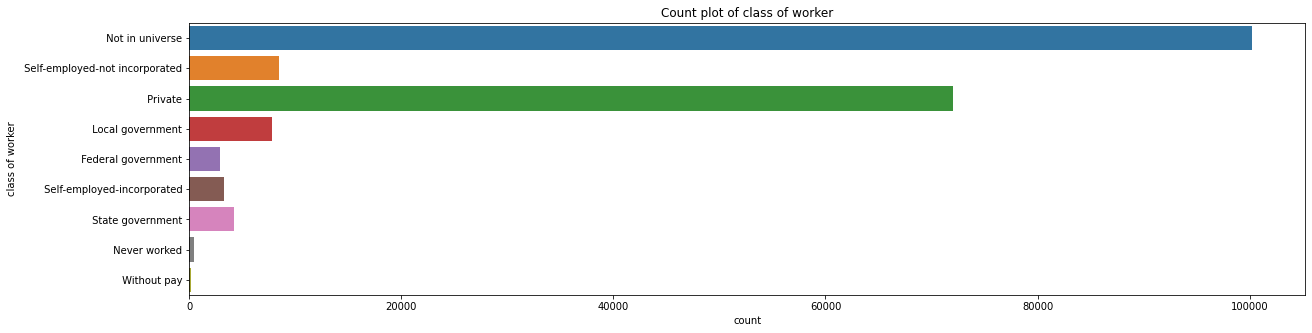

industry code: 
Number of distinct categories = 52 
Majority class = '0' with 50% of samples.


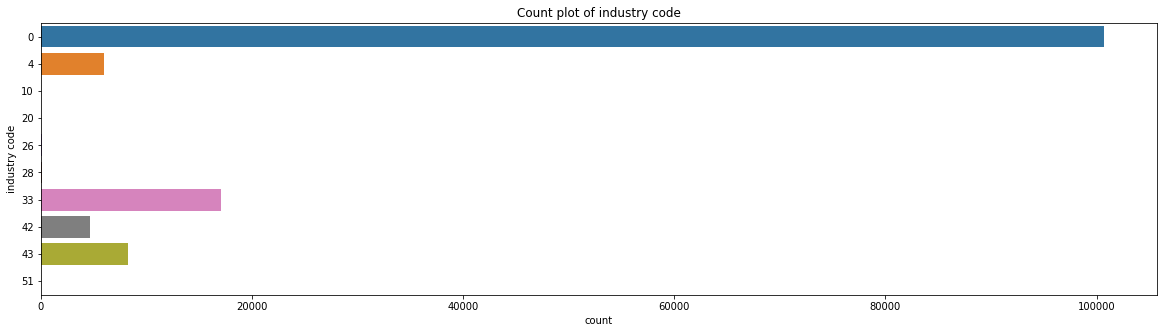

occupation code: 
Number of distinct categories = 45 
Majority class = '0' with 73% of samples.


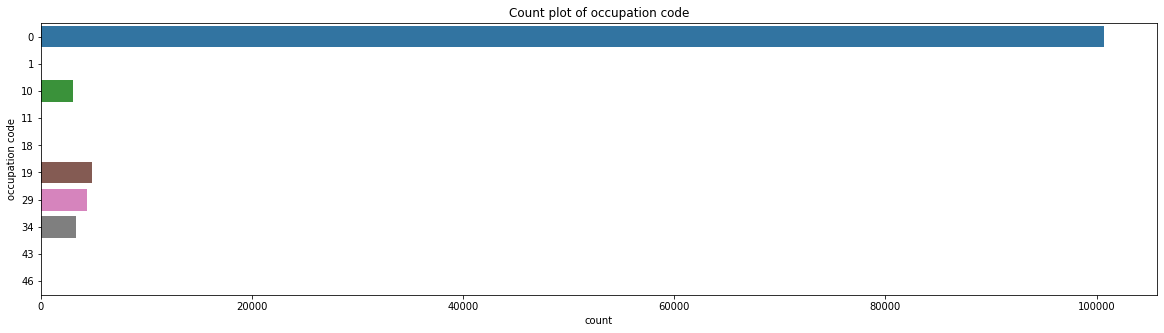

education: 
Number of distinct categories = 17 
Majority class = ' Children' with 41% of samples.


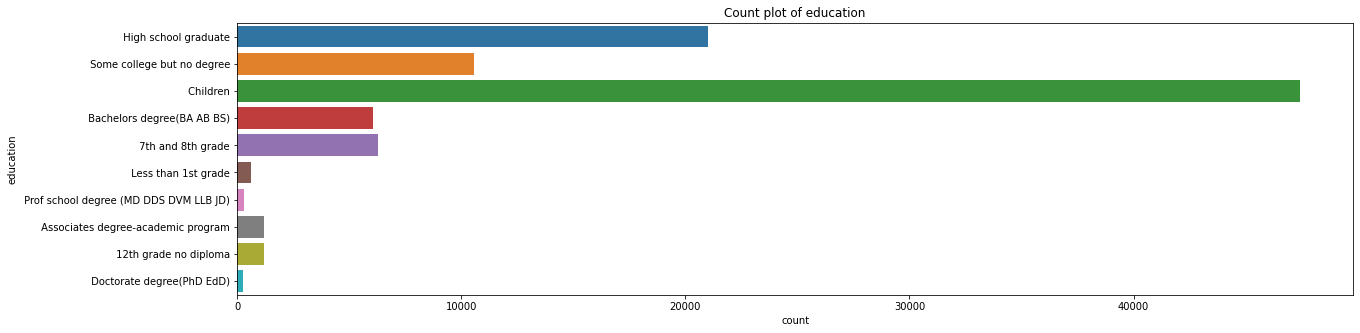

enrolled in edu inst last wk: 
Number of distinct categories = 3 
Majority class = ' Not in universe' with 96% of samples.


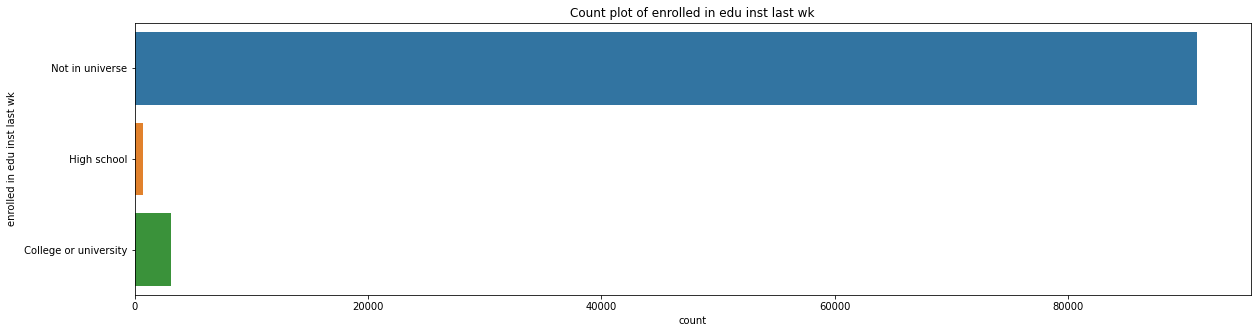

marital status: 
Number of distinct categories = 7 
Majority class = ' Never married' with 62% of samples.


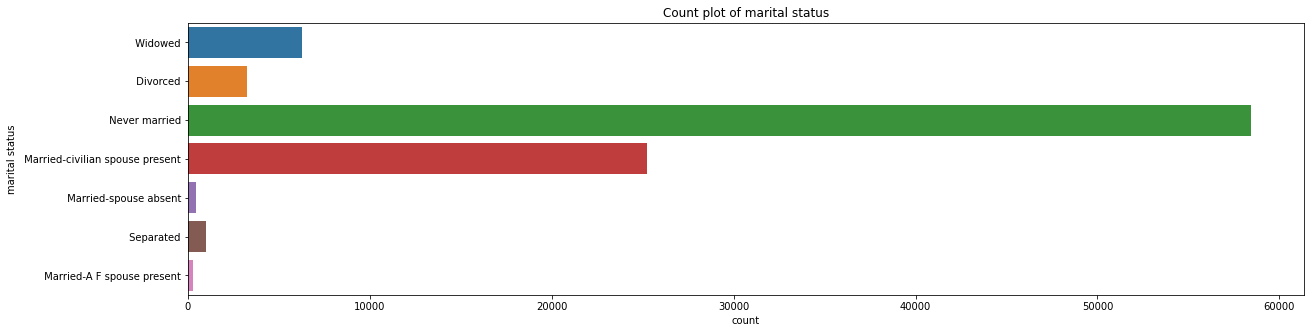

major industry code: 
Number of distinct categories = 7 
Majority class = ' Not in universe or children' with 88% of samples.


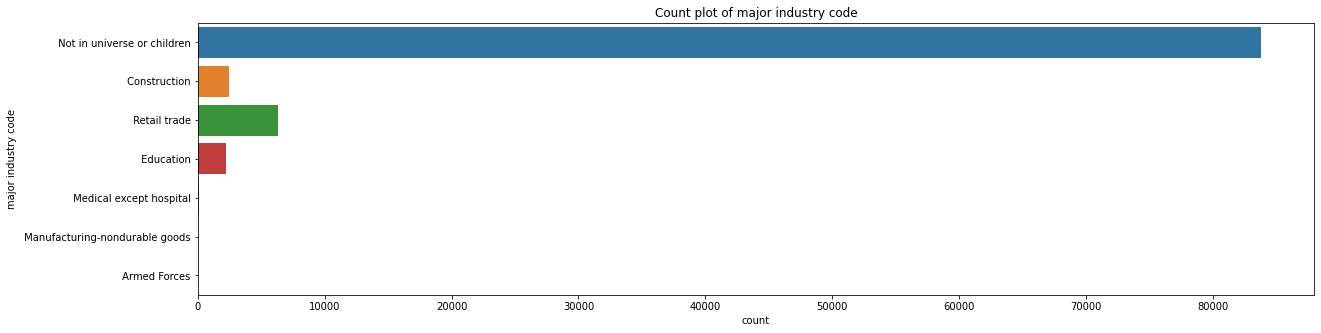

major occupation code: 
Number of distinct categories = 7 
Majority class = ' Not in universe' with 88% of samples.


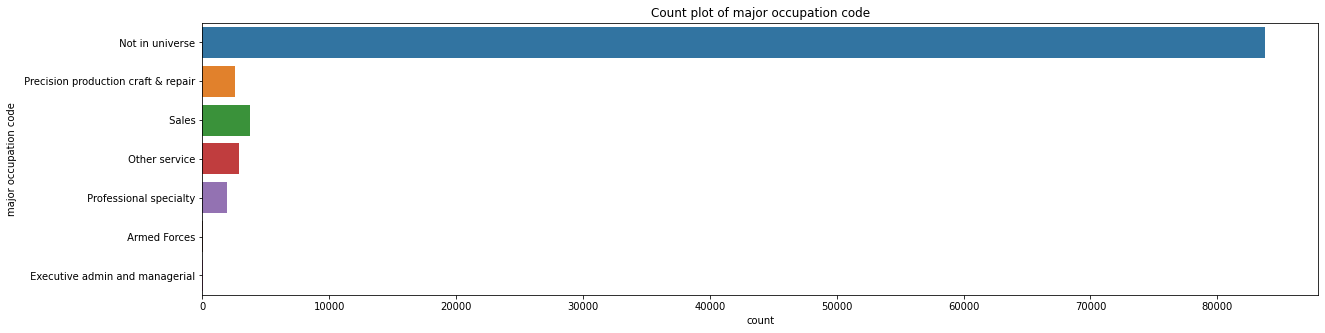

race: 
Number of distinct categories = 5 
Majority class = ' White' with 83% of samples.


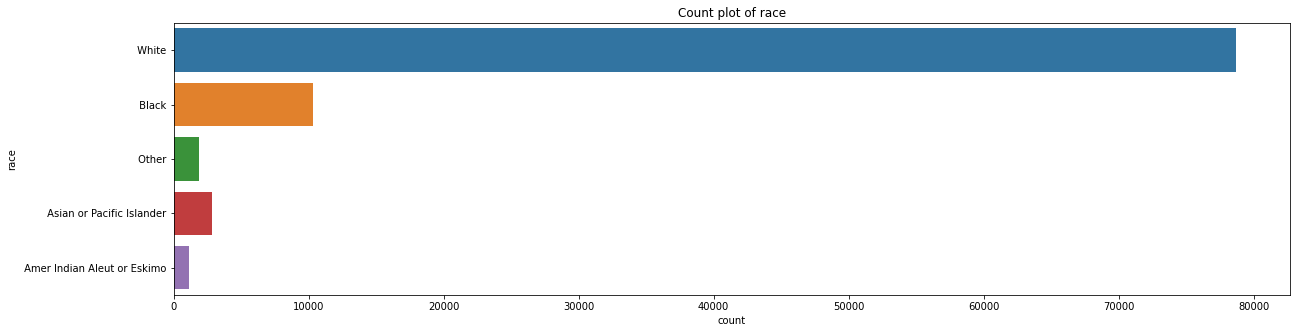

hispanic Origin: 
Number of distinct categories = 10 
Majority class = ' All other' with 86% of samples.


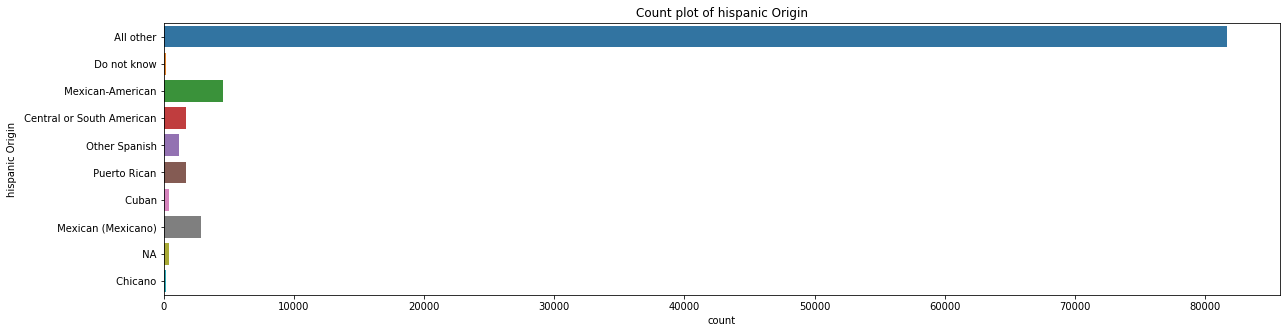

sex: 
Number of distinct categories = 2 
Majority class = ' Female' with 55% of samples.


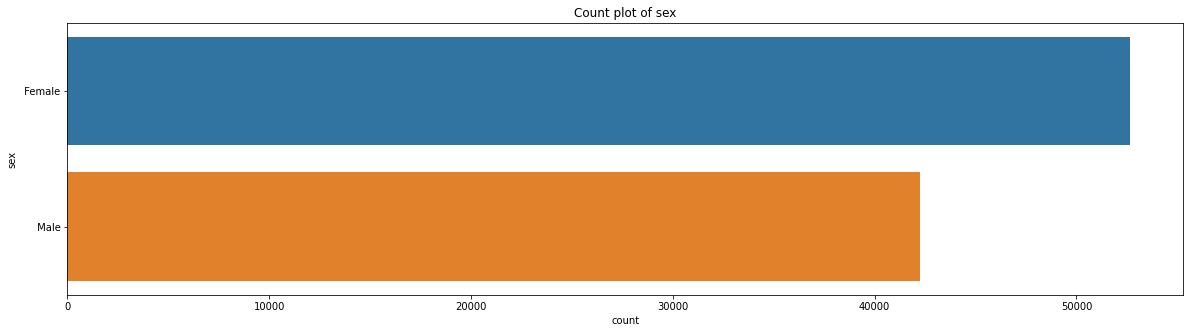

member of a labor union: 
Number of distinct categories = 3 
Majority class = ' Not in universe' with 98% of samples.


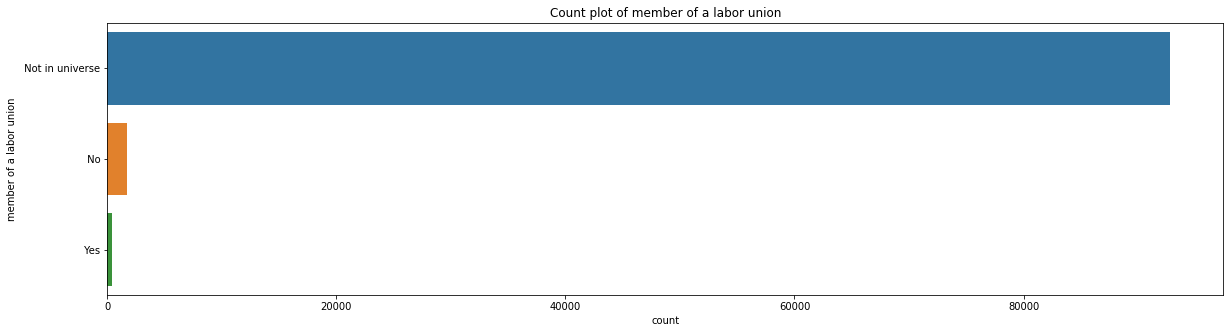

reason for unemployment: 
Number of distinct categories = 6 
Majority class = ' Not in universe' with 99% of samples.


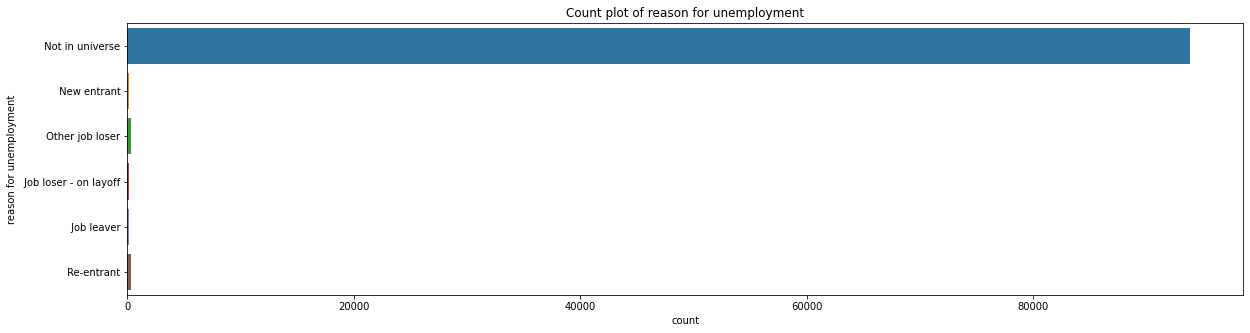

full or part time employment stat: 
Number of distinct categories = 8 
Majority class = ' Children or Armed Forces' with 75% of samples.


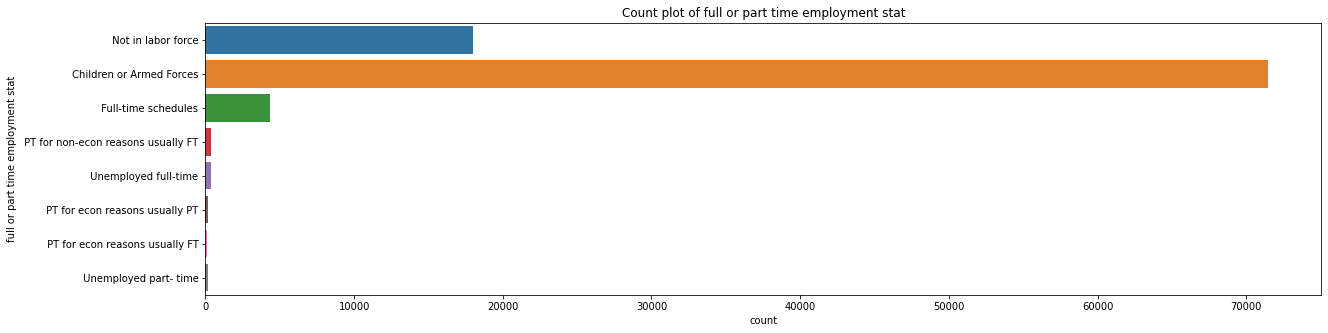

tax filer status: 
Number of distinct categories = 6 
Majority class = ' Nonfiler' with 65% of samples.


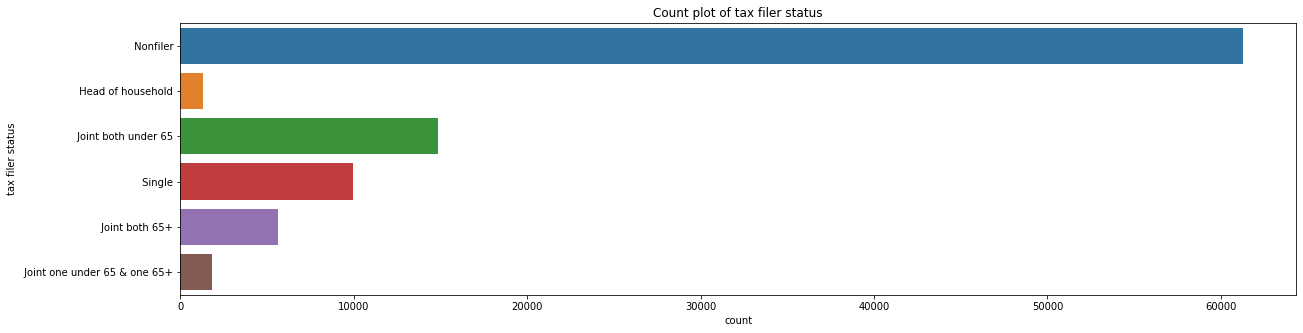

region of previous residence: 
Number of distinct categories = 6 
Majority class = ' Not in universe' with 93% of samples.


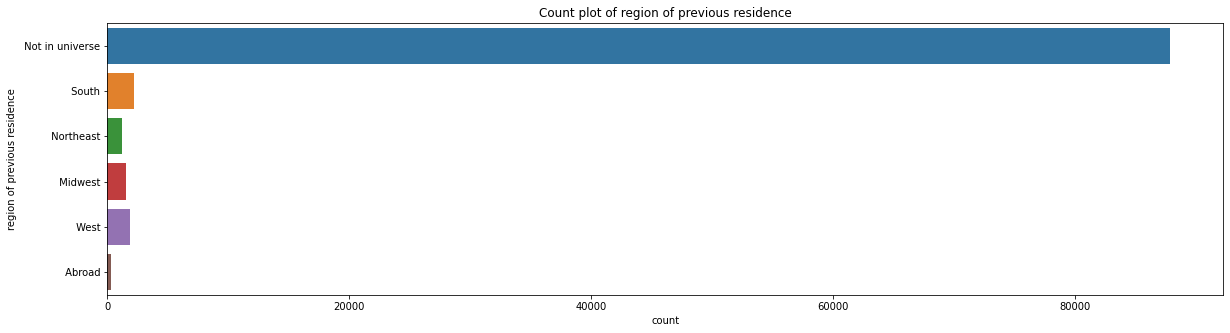

state of previous residence: 
Number of distinct categories = 51 
Majority class = ' Not in universe' with 93% of samples.


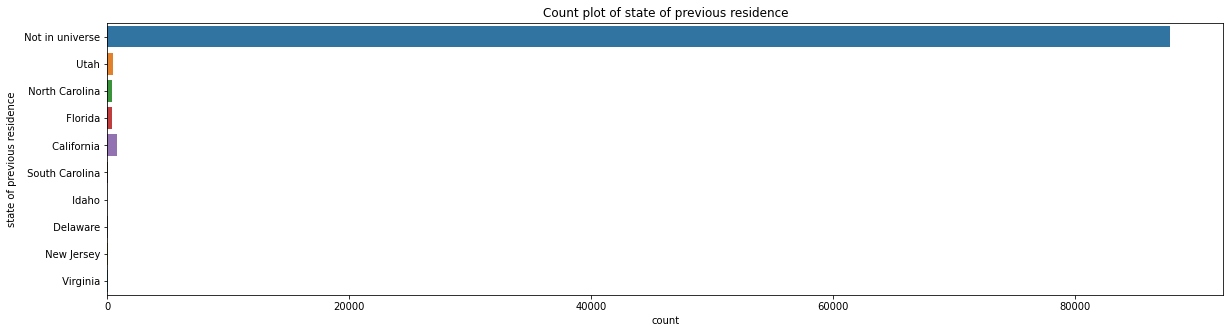

detailed household and family stat: 
Number of distinct categories = 31 
Majority class = ' Child <18 never marr not in subfamily' with 46% of samples.


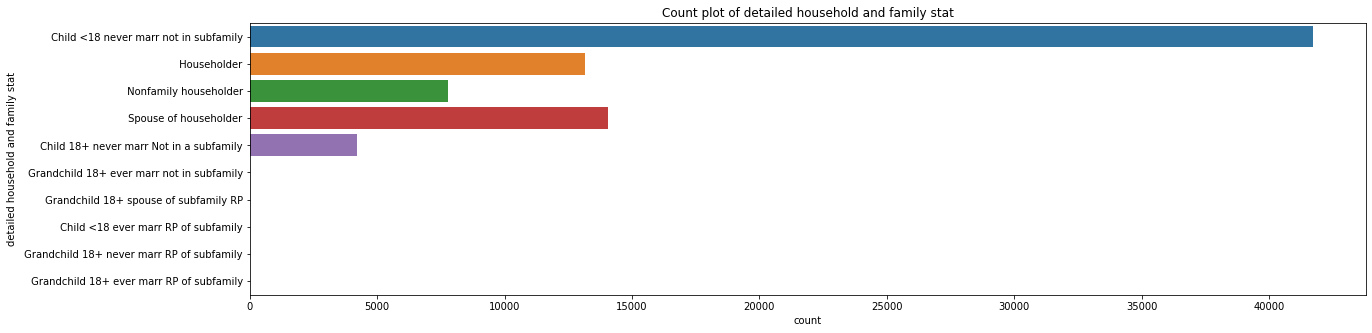

detailed household summary in household: 
Number of distinct categories = 6 
Majority class = ' Child under 18 never married' with 52% of samples.


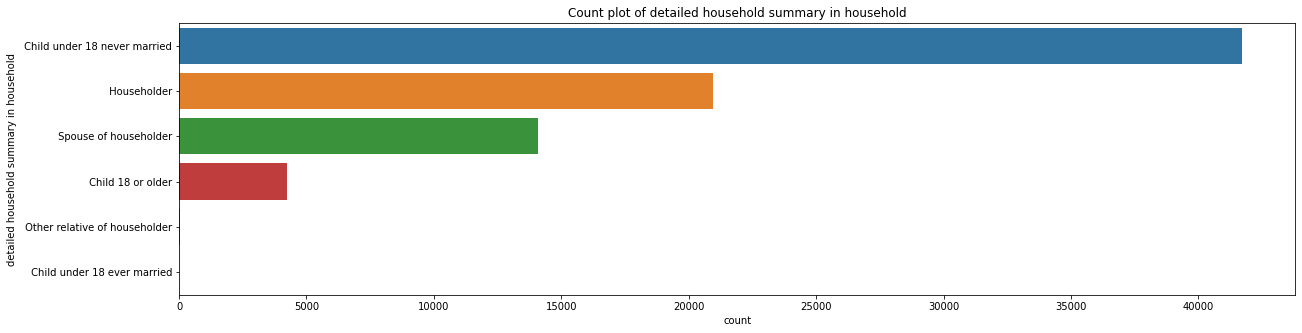

migration code-change in msa: 
Number of distinct categories = 8 
Majority class = ' ?' with 53% of samples.


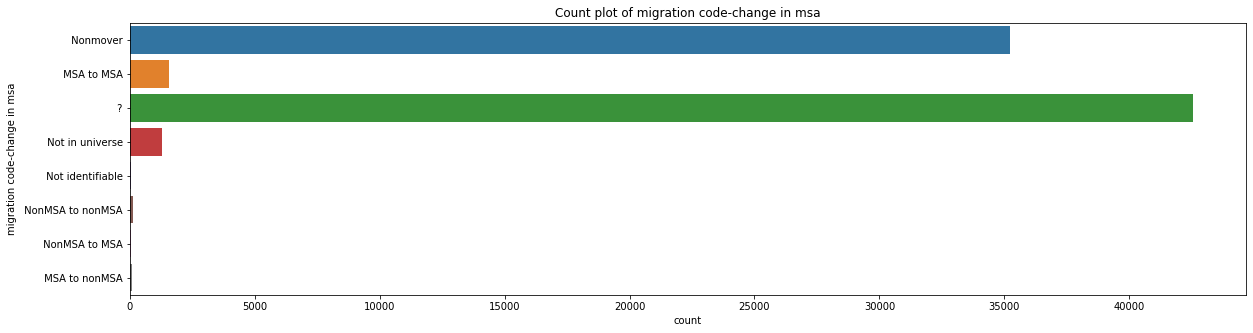

migration code-change in reg: 
Number of distinct categories = 8 
Majority class = ' ?' with 53% of samples.


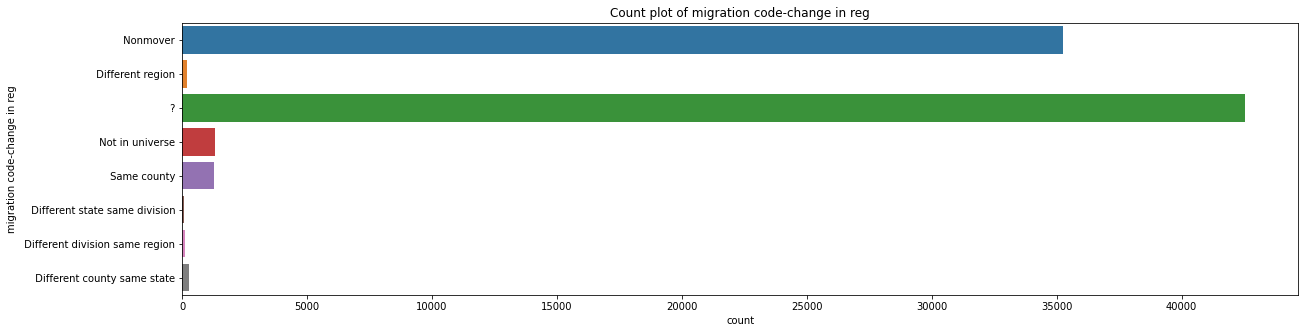

migration code-move within reg: 
Number of distinct categories = 8 
Majority class = ' ?' with 53% of samples.


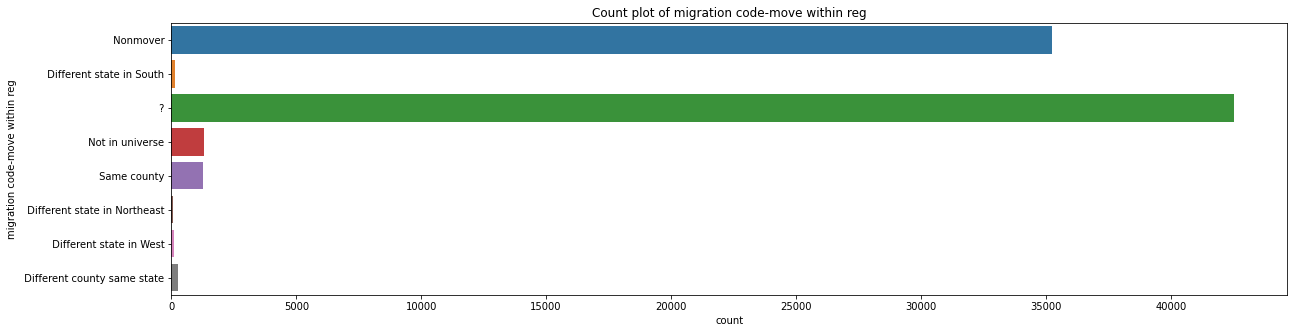

live in this house 1 year ago: 
Number of distinct categories = 3 
Majority class = ' Not in universe under 1 year old' with 54% of samples.


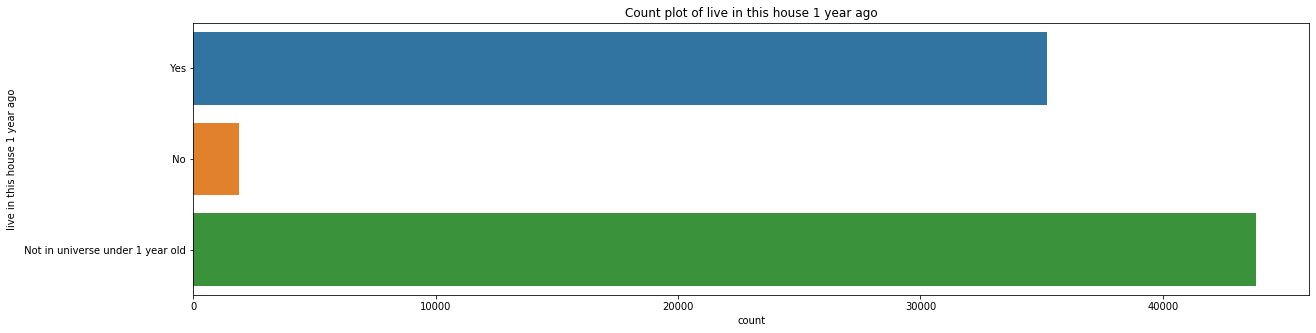

migration prev res in sunbelt: 
Number of distinct categories = 4 
Majority class = ' ?' with 53% of samples.


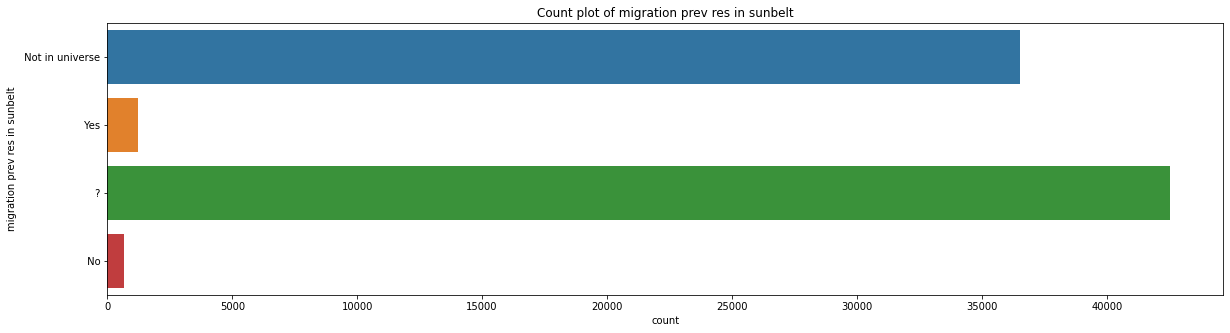

family members under 18: 
Number of distinct categories = 4 
Majority class = ' Not in universe' with 48% of samples.


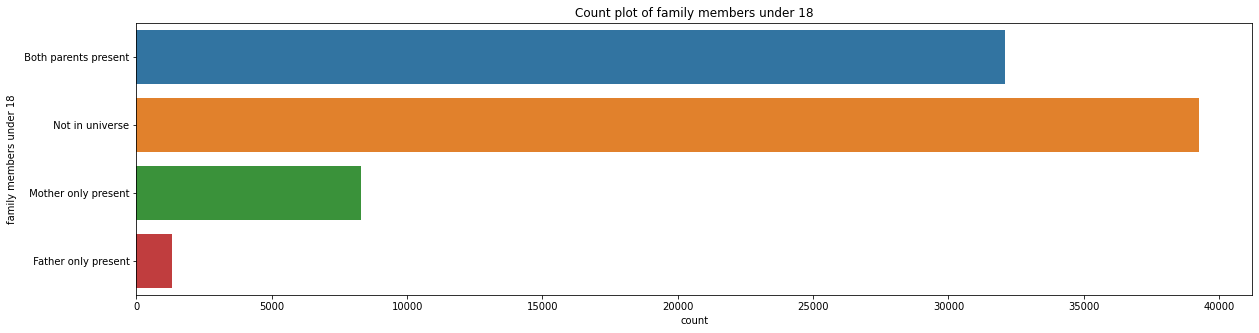

country of birth father: 
Number of distinct categories = 43 
Majority class = ' United-States' with 80% of samples.


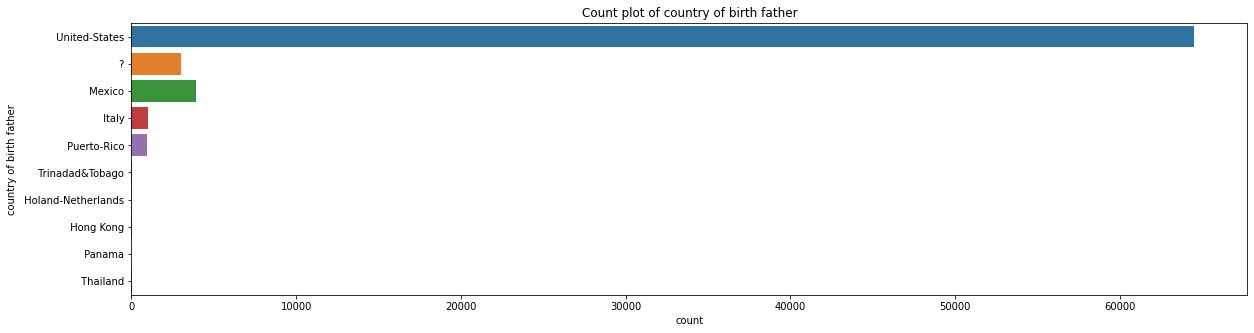

country of birth mother: 
Number of distinct categories = 43 
Majority class = ' United-States' with 87% of samples.


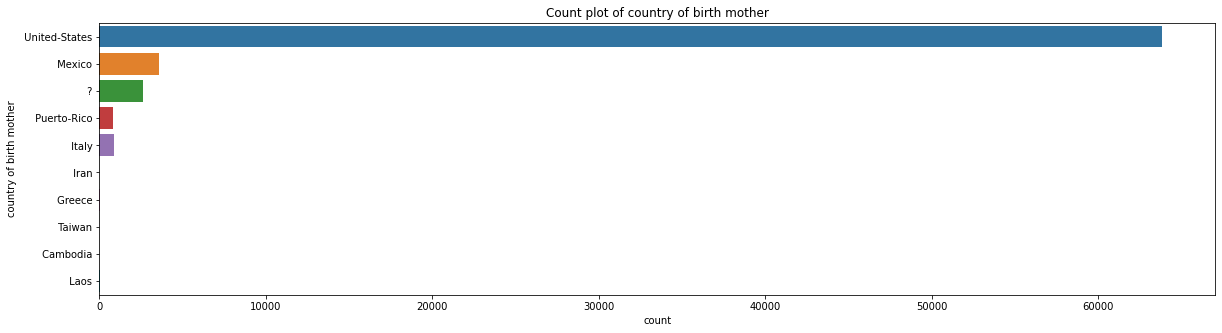

country of birth self: 
Number of distinct categories = 33 
Majority class = ' United-States' with 96% of samples.


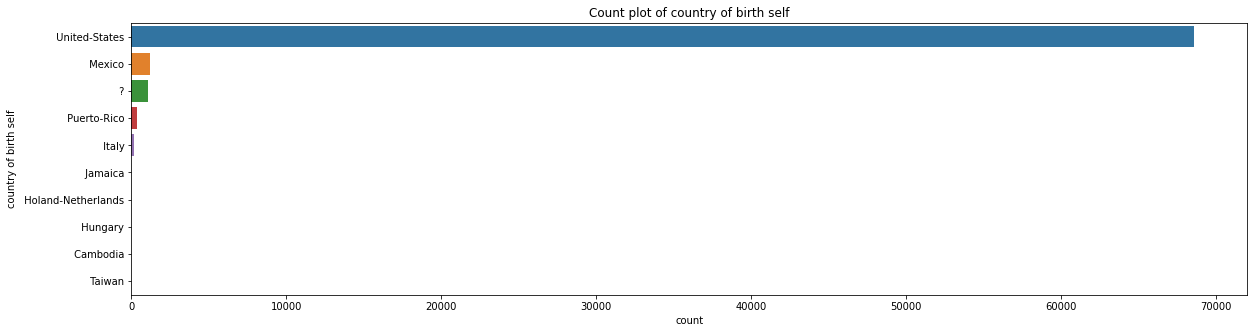

citizenship: 
Number of distinct categories = 5 
Majority class = ' Native- Born in the United States' with 96% of samples.


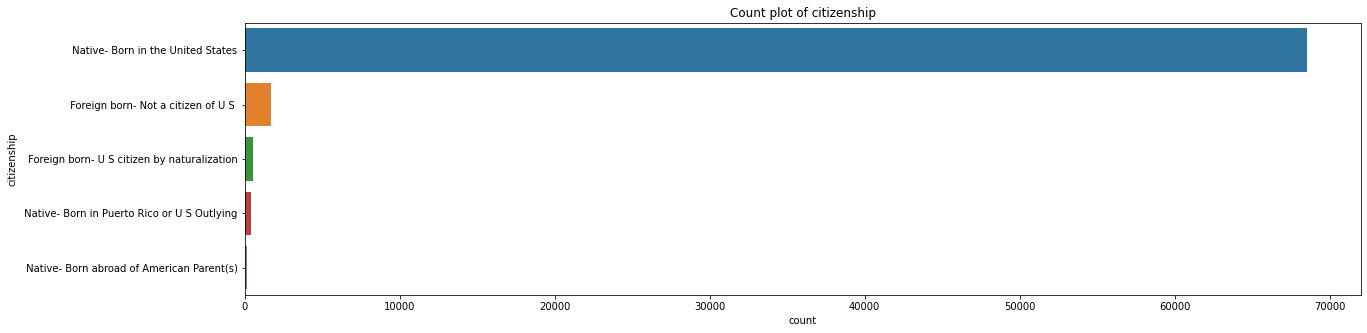

own business or self employed: 
Number of distinct categories = 3 
Majority class = '0' with 97% of samples.


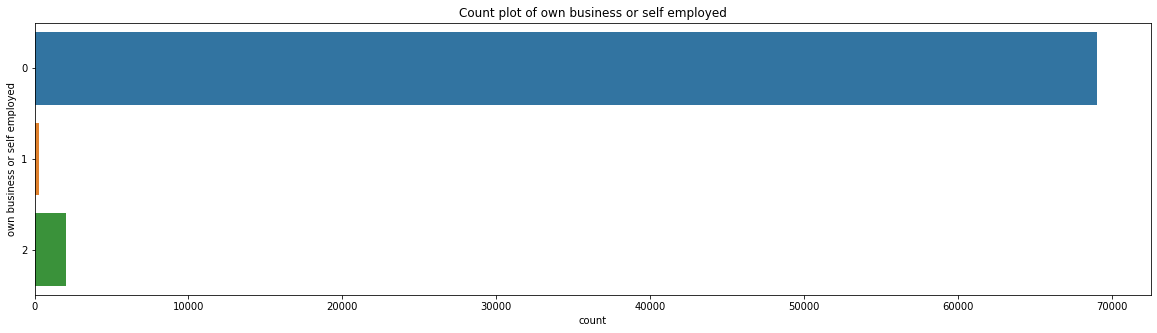

fill inc questionnaire for veteran's admin: 
Number of distinct categories = 3 
Majority class = ' Not in universe' with 99% of samples.


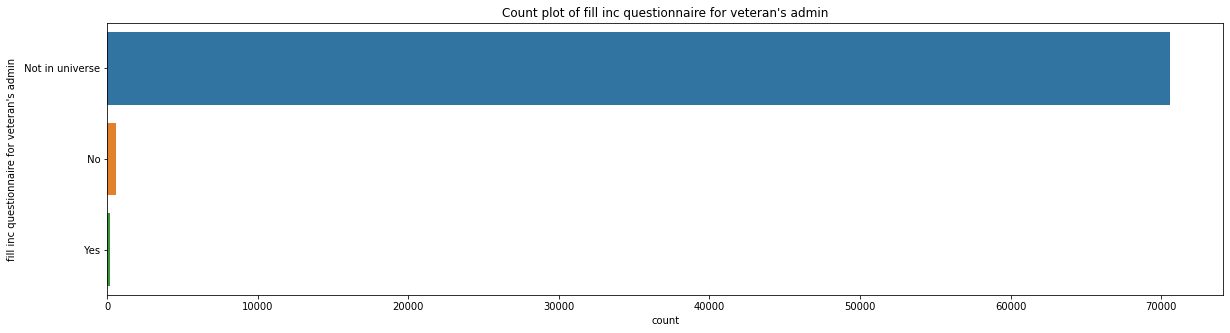

veterans benefits: 
Number of distinct categories = 3 
Majority class = '0' with 51% of samples.


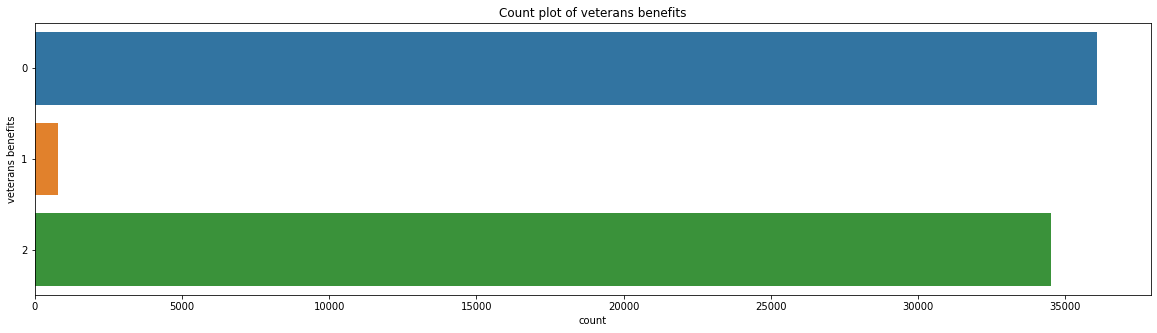

year: 
Number of distinct categories = 2 
Majority class = '95' with 52% of samples.


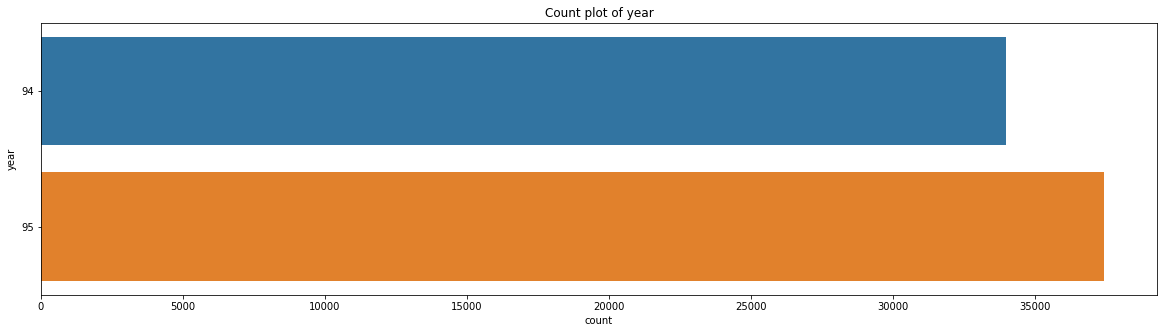

income classification: 
Number of distinct categories = 2 
Majority class = ' - 50000.' with 99% of samples.


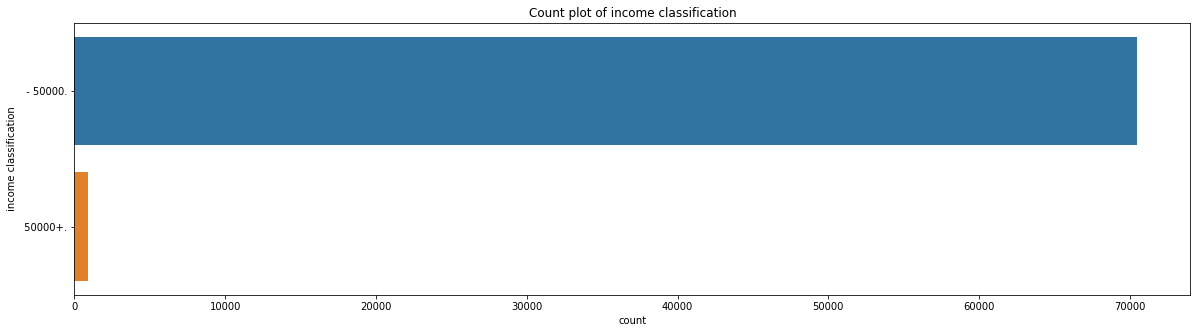

In [9]:
# Categorical variables
univariateCategorical(df, categorical_features)

### Categorical Features: Key observations:

N.B.: we have truncated plotting categorical columns where there are 10 or more to just show the 5 largest and 5 smallest categories, to not take up too much space

* Vast majority of respondent are **privately employed** after those who have never worked
* Common industries include Insurance (33), Social Assistance (43) and Healthcare (42). Uncommon industries include Public Administration (51), Transportating Equipment (10) and Motion Picture industries (26) [additionl info pgs. A10-A11]
* < 25% of sample have had some higher education
* **83% population White**
* Sample is skewed towards **females (55%) vs males (45%)**
* Minority of working class part of labor union
* Many people file jointly for tax - broadly agrees with number of married people in sample
* Appread incomplete data for migration movers since over 53% are "?" (unless we find this was children)
* Most of population born with US with American parents
* Mostly respondent did not receive veterans benefits
* Fairly even split of respondents between **'94 & '95 (48%:52%)**

Income:
* **Top 1% only receiving an income over $50k**

## Takeaways:
* Many cases where number per category can vary quite significantly: this will need to be factored in to any model selection
* Small amount of samples where income>50% may lead to bias, may consider techniques to counter this (e.g. bootstrap sampling)

## 1.2 Bivariate Analysis: Relationship with Income Classification

With each bivariate analysis between income classification and continuous feature, we demonstrate:
* Boxplot to see how sample is split between two classes
* Output mean values of each class
* Conduct **two-tailed t-test** to see if two distributions differ from one another

##### Two-tailed t test:
* Null hypothesis: both distributions have same mean
* Two tailed: since we are interested in cases where 
* Test assumes means of samples come from normal distributions, sample itself may have a non-normal distribution
* If known population standard deviation, alternative would be z-test
* Equation: xbar1 and xbar2 are the sample means, mu1 and mu2 are expected means (equal in this case), s1 and s2 are the standard distributions:

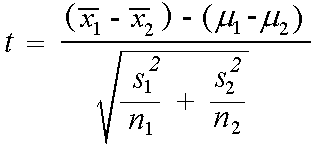
(source: [http://stat.yale.edu](http://stat.yale.edu))


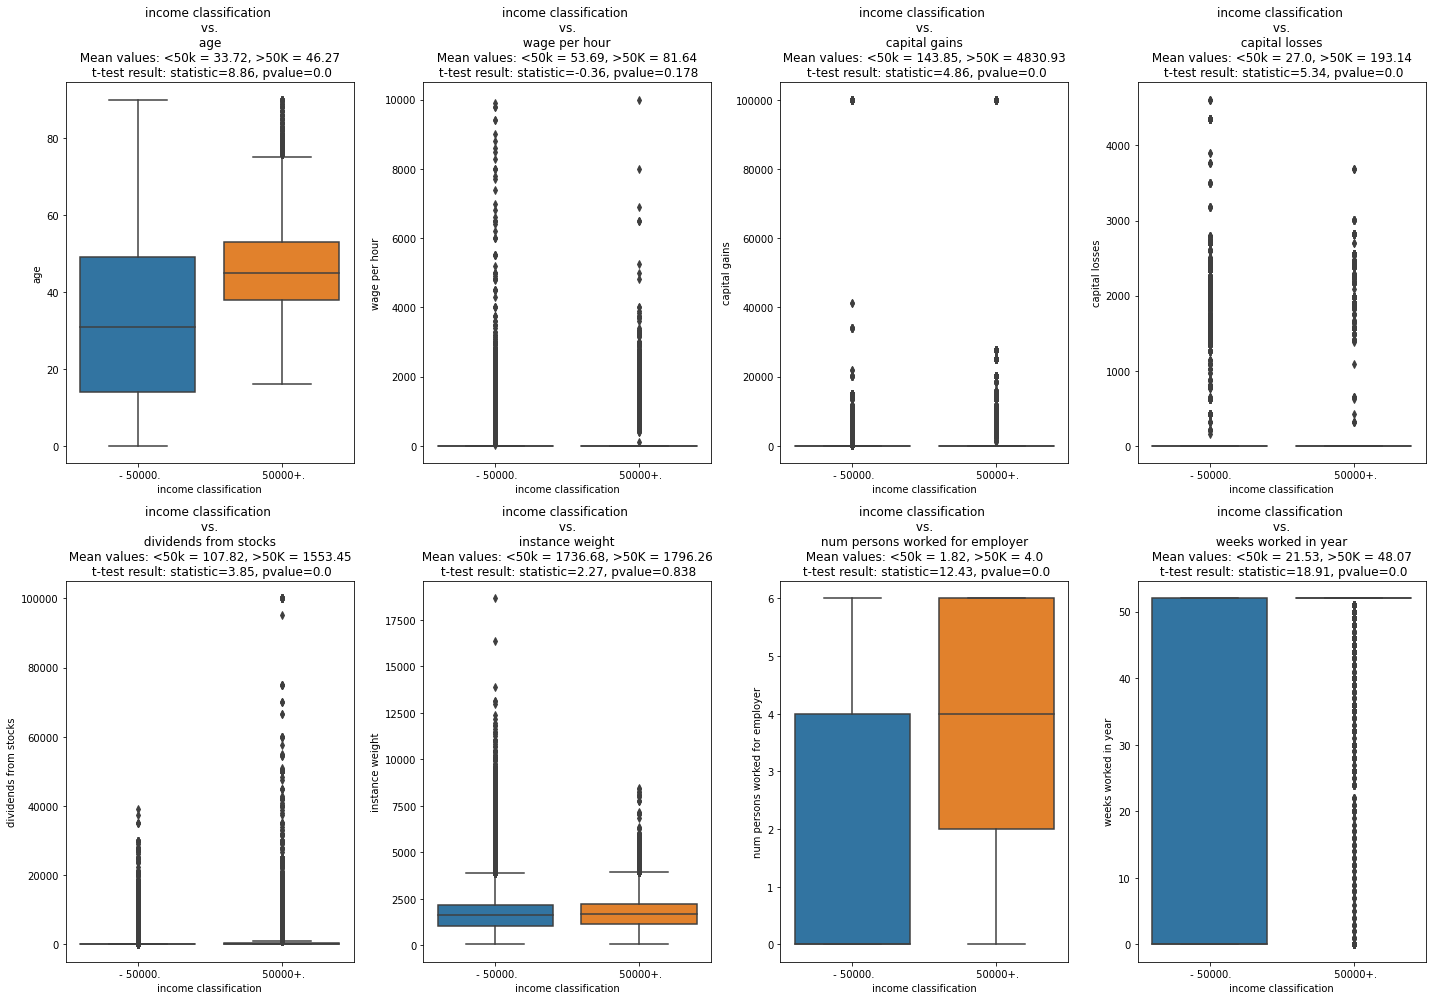

In [10]:
# Continuous variables: boxplots
bivariateContinuous(df, numerical_features, 'income classification', random_seed)

### Income vs Numerical Features: Key observations:

In all features, apart from the instance weight feature, we say that the means of the two classes are different (that is, we reject the null hypothesis from before), since the p-value < 0.1 (threshold for two-tailed test). 

Those in the >50k classification bracket:
* Are older (mean age 46.3yrs vs 33.7yrs), with tighter Interquartle range (IQR = blue/orange area) 
* Earn greater wages, dividends and capital (although noticeably outliers in both classes)
* Have greater number of persons for employer and work longer weeks (again, some outliers in higher income class that work far fewer weeks than the class mean)

With each bivariate analysis between income classification and categorical feature, we demonstrate:
* Boxplot to see how sample is split between two classes
* Conduct **chi squared test**

##### Chi-squared goodness of fit test:
* Null hypothesis: no relationsip exists between two categories (actual distribution does not significantly differ from expected distribution)
* Test takes contingency sample of each category as input
* Equation: 

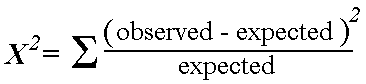
(source: [http://stat.yale.edu](http://stat.yale.edu))


class of worker
Reject null hypothesis between income classification and class of worker


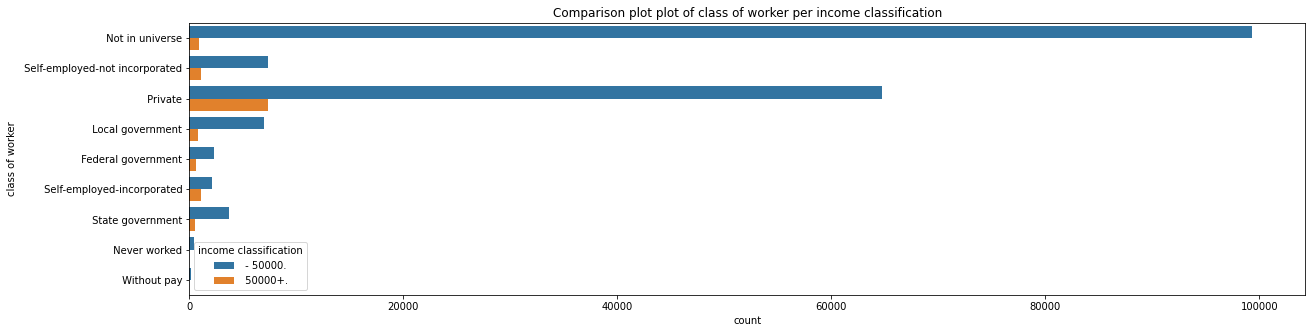


industry code
Reject null hypothesis between income classification and industry code

occupation code
Reject null hypothesis between income classification and occupation code

education
Reject null hypothesis between income classification and education

enrolled in edu inst last wk
Reject null hypothesis between income classification and enrolled in edu inst last wk


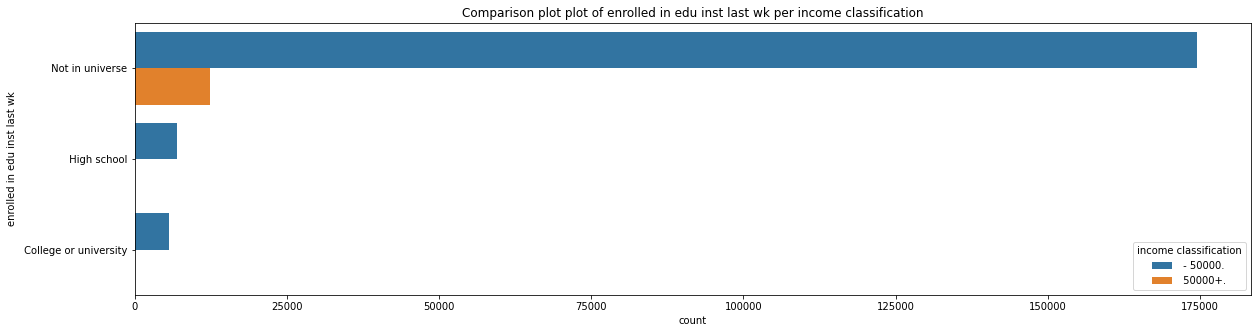


marital status
Reject null hypothesis between income classification and marital status


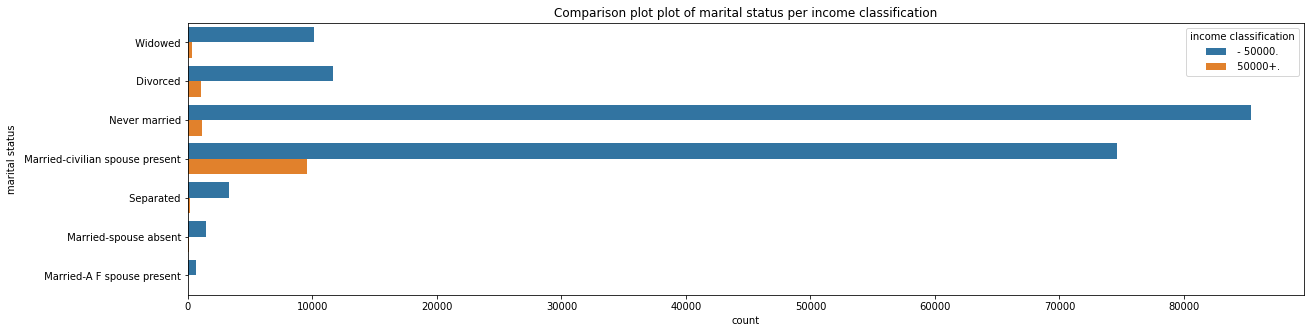


major industry code
Reject null hypothesis between income classification and major industry code

major occupation code
Reject null hypothesis between income classification and major occupation code

race
Reject null hypothesis between income classification and race


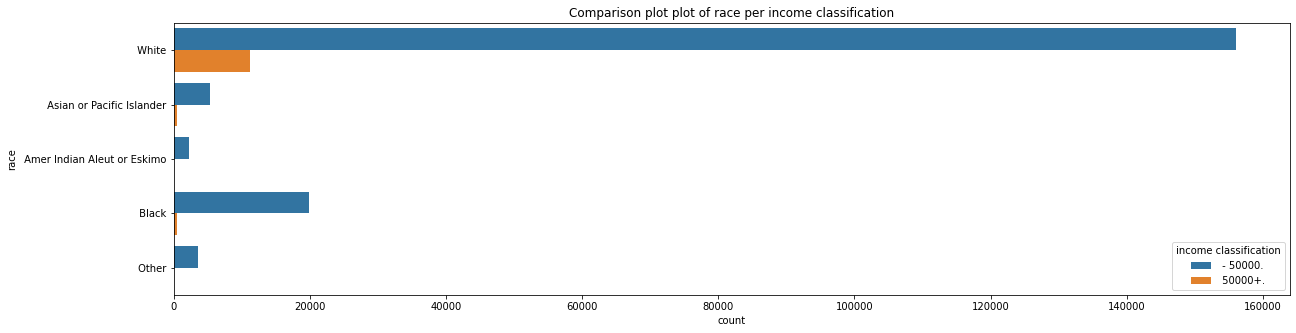


hispanic Origin
Reject null hypothesis between income classification and hispanic Origin


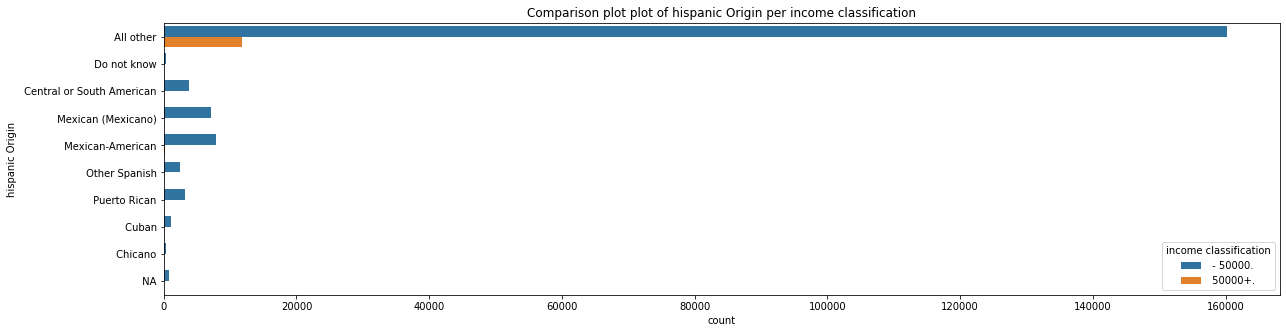


sex
Reject null hypothesis between income classification and sex


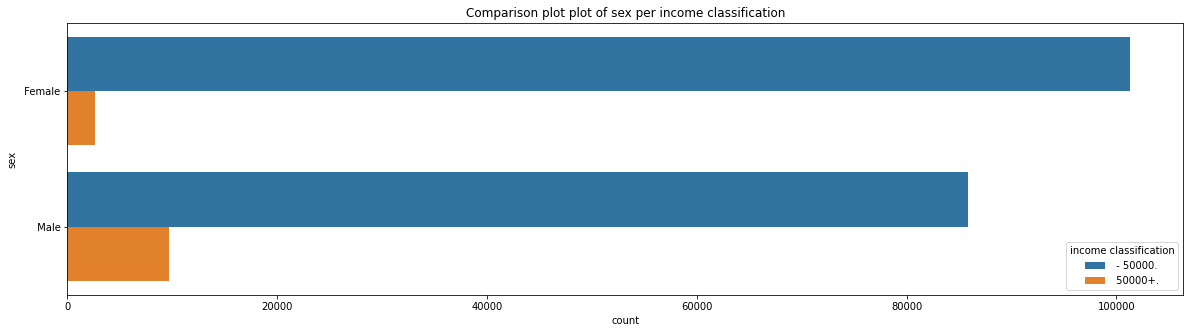


member of a labor union
Reject null hypothesis between income classification and member of a labor union


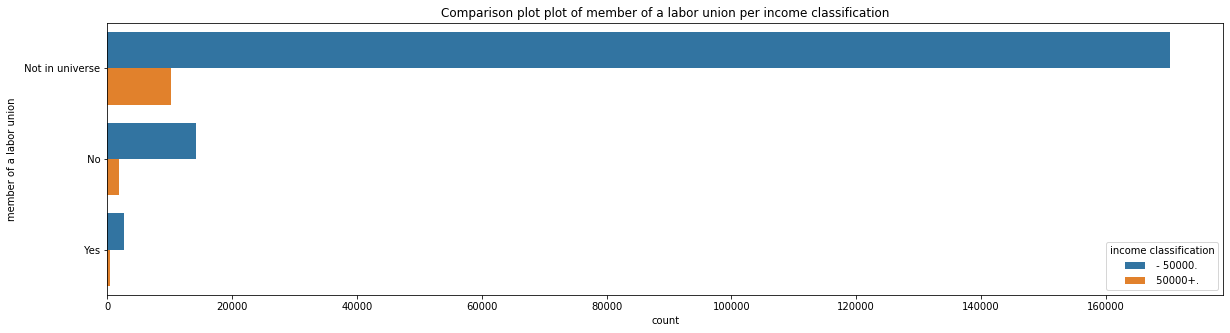


reason for unemployment
Reject null hypothesis between income classification and reason for unemployment


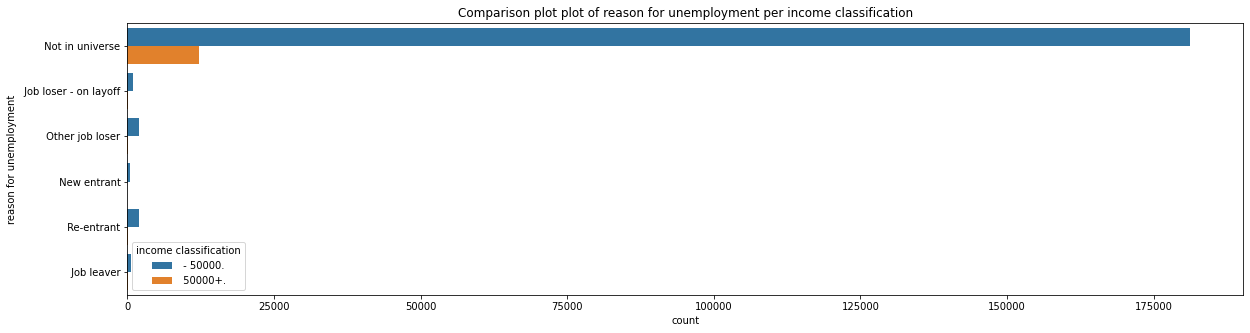


full or part time employment stat
Reject null hypothesis between income classification and full or part time employment stat


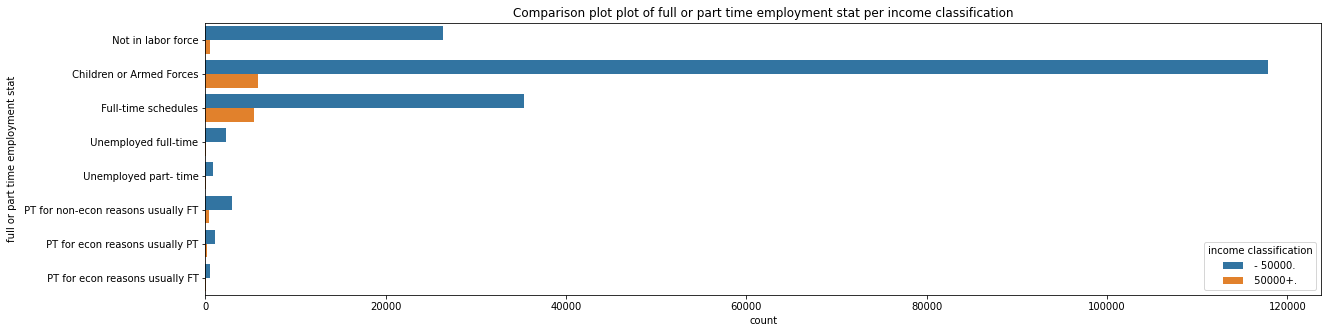


tax filer status
Reject null hypothesis between income classification and tax filer status


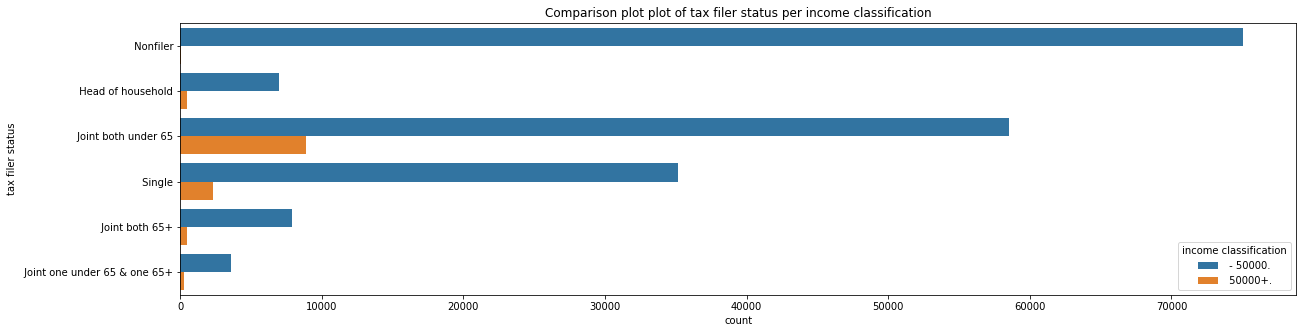


region of previous residence
Do not reject null hypothesis between income classification and region of previous residence


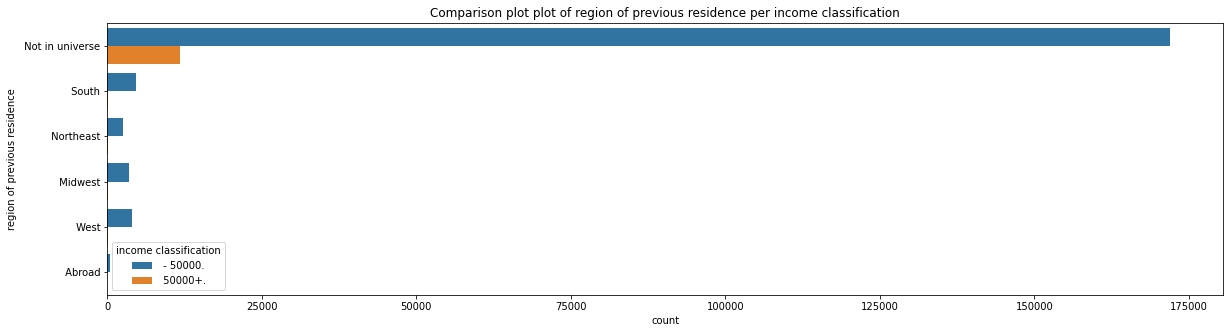


state of previous residence
Do not reject null hypothesis between income classification and state of previous residence

detailed household and family stat
Reject null hypothesis between income classification and detailed household and family stat

detailed household summary in household
Reject null hypothesis between income classification and detailed household summary in household


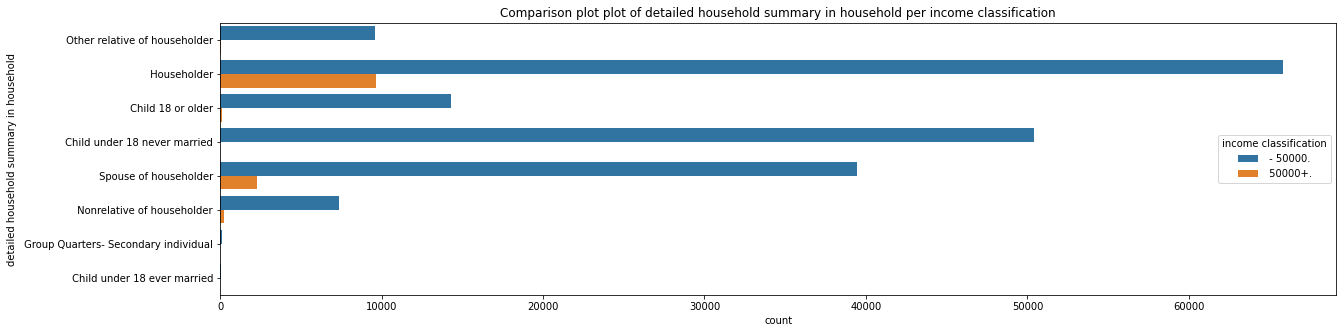


migration code-change in msa
Reject null hypothesis between income classification and migration code-change in msa


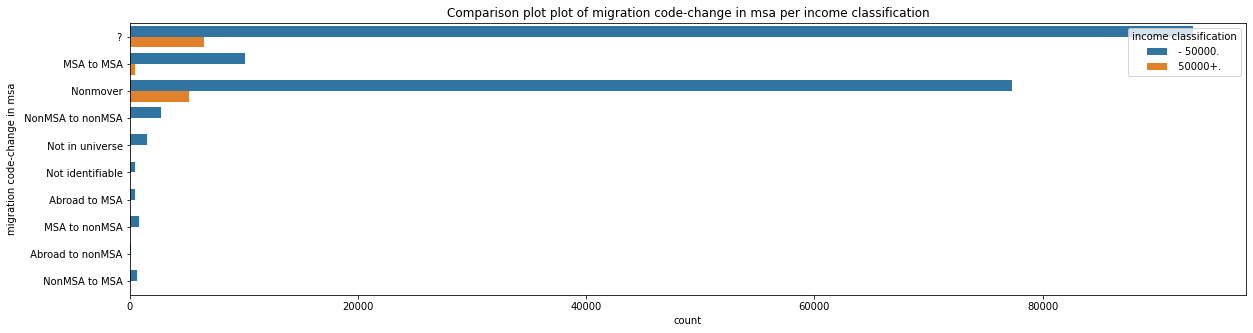


migration code-change in reg
Do not reject null hypothesis between income classification and migration code-change in reg


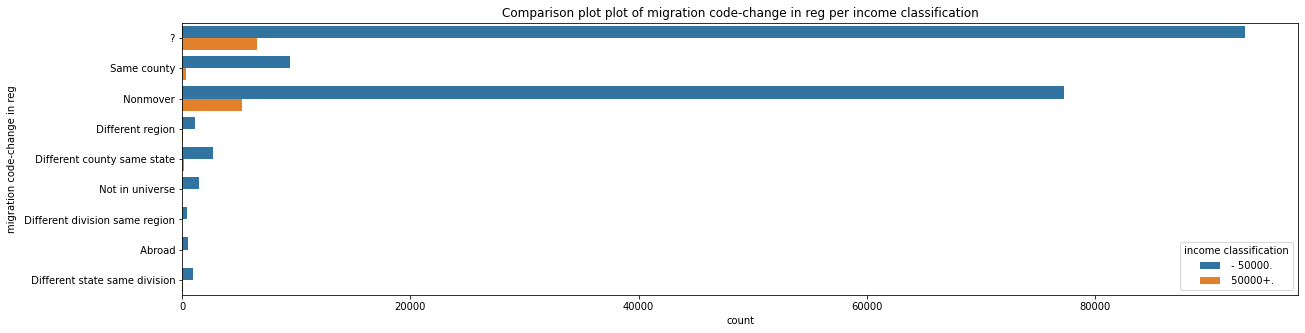


migration code-move within reg
Reject null hypothesis between income classification and migration code-move within reg


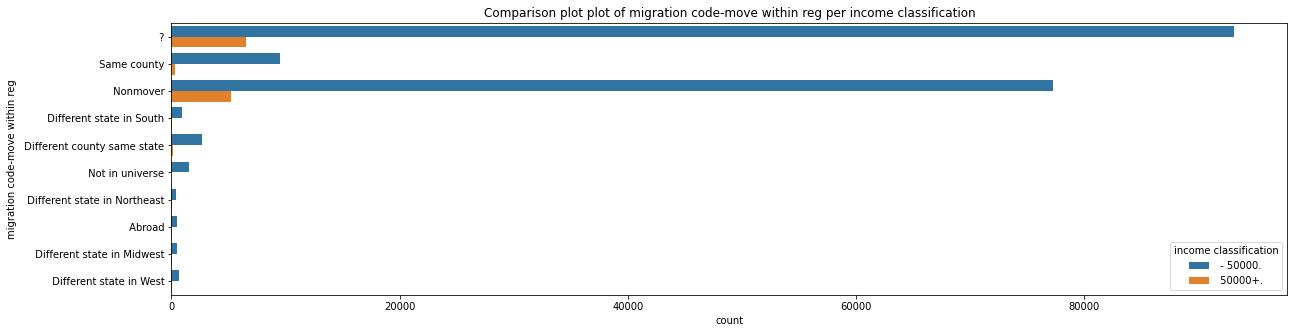


live in this house 1 year ago
Reject null hypothesis between income classification and live in this house 1 year ago


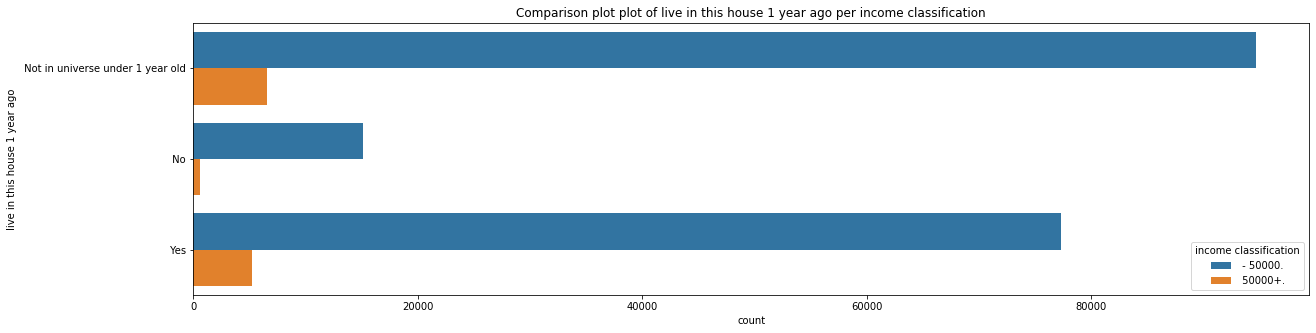


migration prev res in sunbelt
Reject null hypothesis between income classification and migration prev res in sunbelt


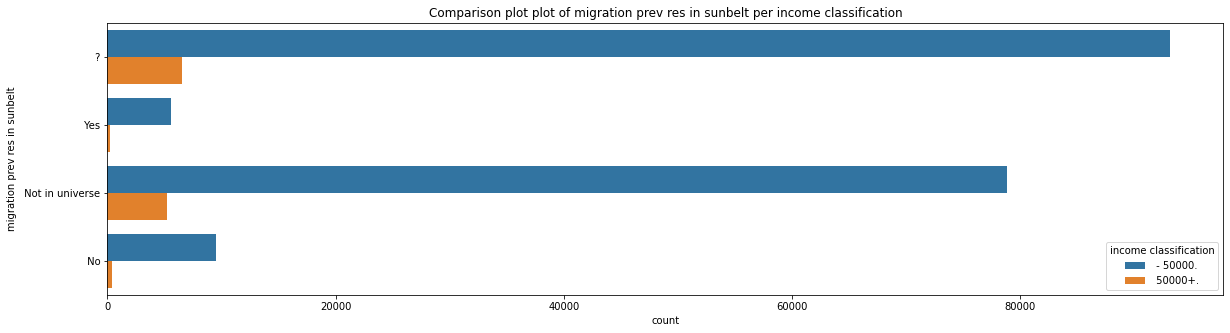


family members under 18
Reject null hypothesis between income classification and family members under 18


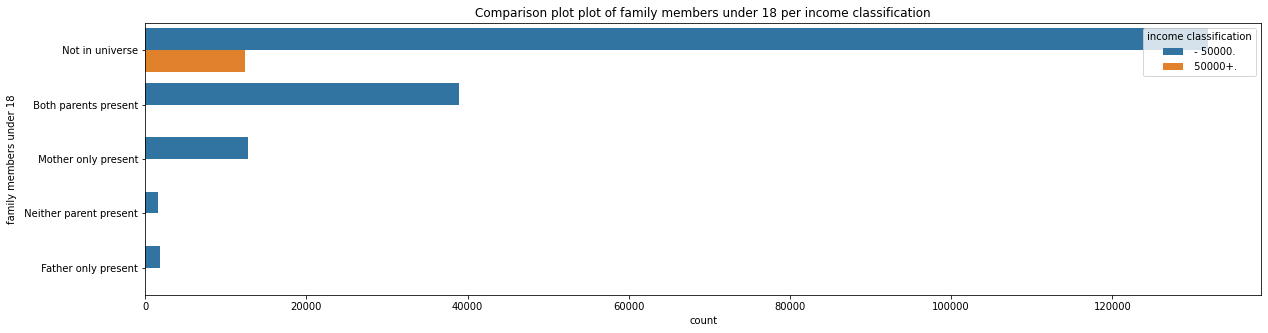


country of birth father
Reject null hypothesis between income classification and country of birth father

country of birth mother
Reject null hypothesis between income classification and country of birth mother

country of birth self
Reject null hypothesis between income classification and country of birth self

citizenship
Reject null hypothesis between income classification and citizenship


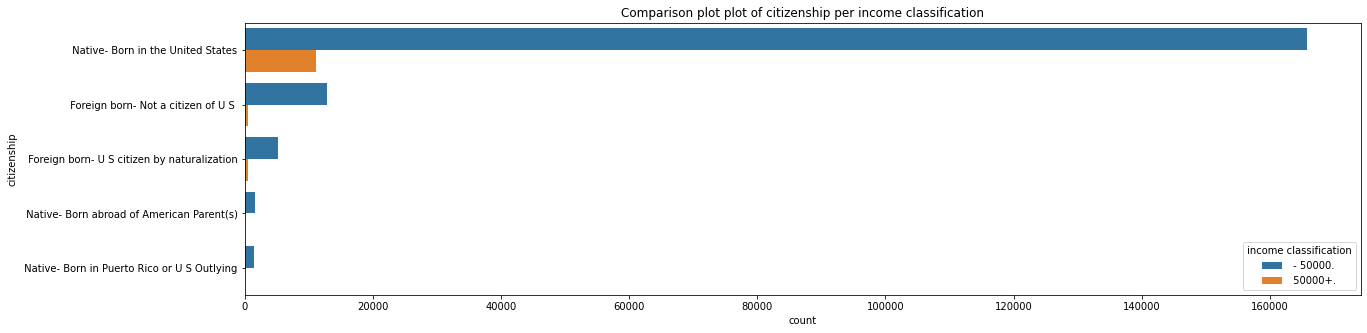


own business or self employed
Reject null hypothesis between income classification and own business or self employed


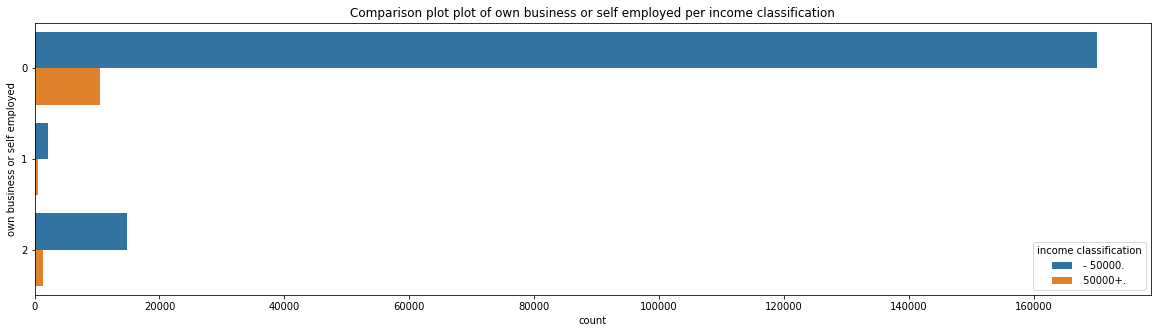


fill inc questionnaire for veteran's admin
Reject null hypothesis between income classification and fill inc questionnaire for veteran's admin


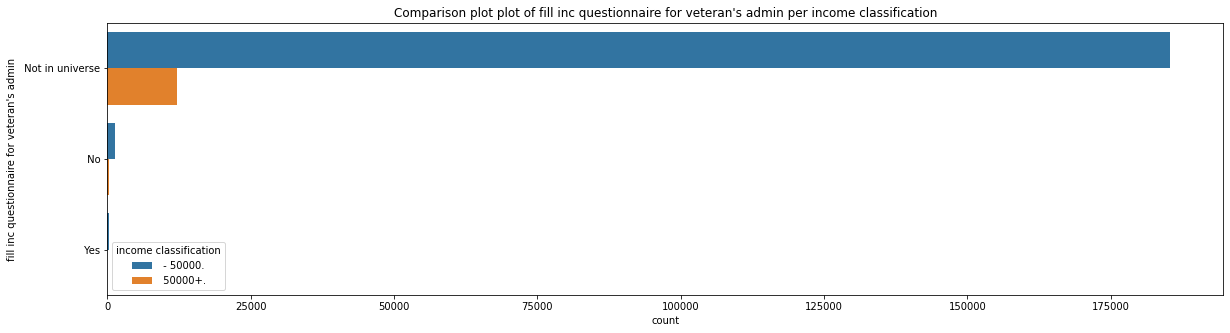


veterans benefits
Reject null hypothesis between income classification and veterans benefits


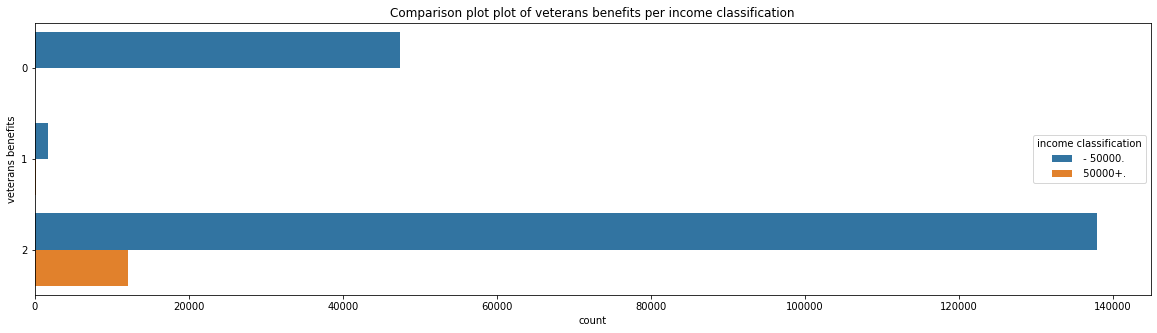


year
Reject null hypothesis between income classification and year


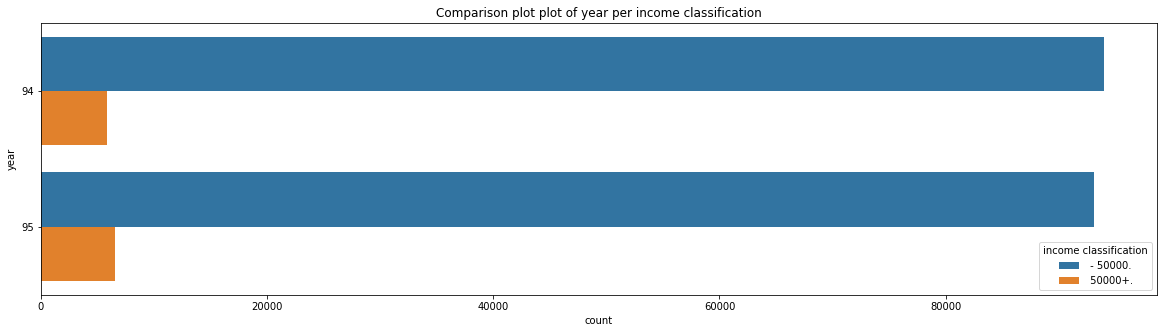

In [11]:
# Bivariate analysis: categorical
bivariateCategorical(df, categorical_features[:-1], "income classification", random_seed)

### Income vs Categorical Features: Key observations:

In all features, apart from the instance weight feature, we reject the null hypothesis that there is insignificant difference between the observed and expected values of the categories. Thus, all categorical features will have some effect on the class

## 1.3 Multivariate Analysis

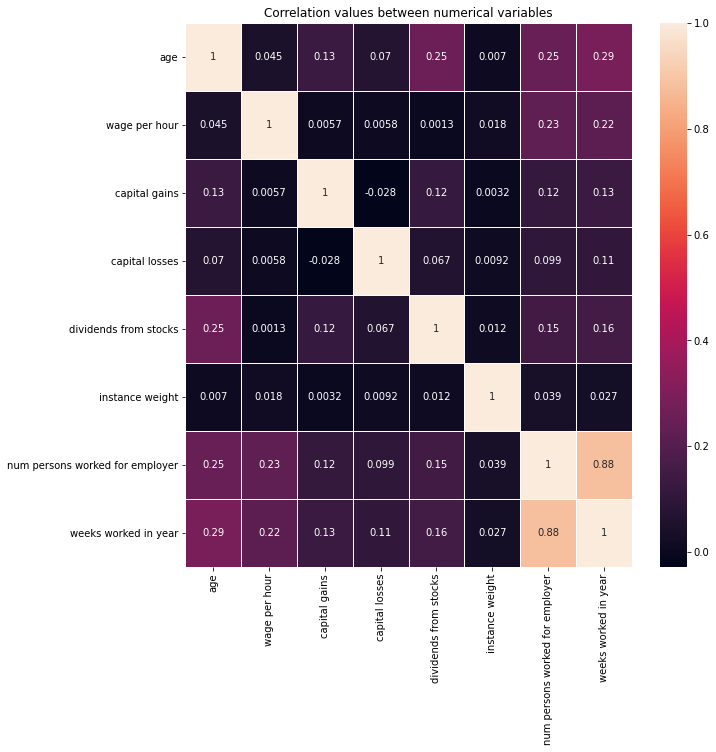

In [12]:
# continuous-continuous: plot correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df[numerical_features].corr('spearman'), annot=True, linewidths=0.5)
plt.title("Correlation values between numerical variables")
plt.show()

### Continuous Multivariate: Key observations:

Above you can find a correlation matrix of continuous variables, where Spearman parametric test is used to find the correlation between two features -1 < 0 < 1 (closer to -1/1, the more negatively/positively correlated. Spearman can demonstrate monotonic relationship between two features, pearson's would tell us the linear relationship)

Features with some correlation:
* num persons worked for employer vs weeks worked in year (corr=0.88)
* age and weeks worked in year (corr=0.29)
* age and dividend from stocks (corr=0.25)
* wage per hour and no. persons worked for employer (corr=0.23)

Also, we can see that instance weight has almost no correlation with any other features, which is to be expected so that we have a proportional distribution of the population.

# 2. Feature Preparation

We take a few steps to prepare our features:

1. Map income to binary values
2. Fill nulls
3. Encode categorical variables
4. Scaling features

**Strategies to fill nulls**:

There are several strategies that can be used to fill nulls in a dataset:
* With a nominal value (e.g. -99)
* With the mean/median/mode of the feature
* (continuous variables): interpolating values
* (categorical variables): imputing values using a classifier e.g. random forest

In our case, all the features are categorical. For sake of ease, we will fill these values in with the mode of that column.

**Encoding categorical variables**:

The two common methods to encode categorical variables is using label encoding (replacing each object with an integer), or one hot encoding (creating a pivot of the features so that the values are columns, and have binary 0/1 values for each entry).

For the purposes of this exercise we will use label encoding only. Possible issues can happen if label encoding introduces some element of ordinality into features which do not exhibit this (example feature is 'state of previous residence').

**Scaling features**

Scaling has benefits to reduce the potential for one feature to mask effects of another feature simply because of relative magnitudes. Some scaling strategies involve:
* z-scaling (or Standard Scaling: subtract sample mean then divide by sample standard deviation)
* min-max scaling (map range of values to proportionally fit usually between 0 and 1)

In [13]:
# Generate features
X_train, y, X_test, y_t = featurePrep(df, df_test, categorical_features)

# Example output
X_train.head()

Columns which have missing values before imputation:
migration code-change in msa      99696
migration code-change in reg      99696
migration code-move within reg    99696
migration prev res in sunbelt     99696
country of birth father            6713
country of birth mother            6119
country of birth self              3393
state of previous residence         708
dtype: int64
Columns which have missing values before imputation:
migration code-change in msa      49946
migration code-change in reg      49946
migration code-move within reg    49946
migration prev res in sunbelt     49946
country of birth father            3429
country of birth mother            3072
country of birth self              1764
state of previous residence         330
dtype: int64


,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,race,hispanic Origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year
0,1.725879,-0.439146,-0.849740,-0.782235,0.476524,-0.201629,0.244533,2.126157,0.207994,-0.097301,0.412334,-0.363192,-0.958533,0.215699,-0.03007,1.097682,-0.092542,-0.137236,-0.099553,0.564160,-0.017198,0.176125,0.344851,0.982564,0.245643,-0.017389,0.012536,-0.54229,0.075097,-0.827096,0.589025,0.381853,0.377326,0.277837,0.343561,-0.316851,0.060524,0.569799,-0.949346,1.000657
1,1.053560,2.275109,-0.628343,1.570028,1.447186,-0.201629,0.244533,-2.134072,-1.884785,0.546914,0.412334,-0.363192,1.043261,0.215699,-0.03007,-0.574772,-0.092542,-0.137236,-0.099553,-2.323698,2.138205,-5.720387,-0.005216,0.016251,-3.801875,2.693234,2.342506,-2.16289,3.641747,-0.404284,0.589025,0.381853,0.377326,0.277837,0.343561,-0.316851,0.060524,0.569799,1.180804,-0.999344
2,-0.739291,-0.439146,-0.849740,-0.782235,-2.435461,-0.201629,-2.426254,0.706081,0.207994,-0.097301,-3.064063,-0.363192,-0.958533,0.215699,-0.03007,1.097682,-0.092542,-0.137236,-0.099553,0.564160,-0.017198,0.176125,-1.580516,-1.916375,0.245643,-0.017389,0.012536,-0.54229,0.075097,-0.827096,0.589025,0.502537,0.498794,0.430992,-3.254776,-0.316851,0.060524,0.569799,-0.949346,1.000657
3,-1.142682,-0.439146,-0.849740,-0.782235,-0.008807,-0.201629,0.244533,0.706081,0.207994,-0.097301,0.412334,-0.363192,-0.958533,0.215699,-0.03007,-0.574772,-0.092542,-0.137236,-0.099553,0.564160,-0.017198,0.176125,-1.055416,-0.950062,0.245643,-0.017389,0.012536,1.07831,0.075097,-0.827096,-1.901181,0.381853,0.377326,0.277837,0.343561,-0.316851,0.060524,-1.779077,-0.949346,-0.999344
4,-1.097861,-0.439146,-0.849740,-0.782235,-0.008807,-0.201629,0.244533,0.706081,0.207994,-0.097301,0.412334,-0.363192,-0.958533,0.215699,-0.03007,-0.574772,-0.092542,-0.137236,-0.099553,0.564160,-0.017198,0.176125,-1.055416,-0.950062,0.245643,-0.017389,0.012536,1.07831,0.075097,-0.827096,-1.901181,0.381853,0.377326,0.277837,0.343561,-0.316851,0.060524,-1.779077,-0.949346,-0.999344


## 3. Data Modeling

### Models to be trialled:

1. **Logistic regression**: Using a logistic function to model the conditional probabilities P(Y=1| X) or P(Y=0|X). There is no need for a linear relationship between dependent/independent variables, neither the error terms to be normally distributed.

2. **Random forest classifier**: An ensemble model that fits a number of decision tree classifiers (user defined) on subsamples of the dataset (bootstrap aggregating) and uses averaging to improve the accuracy. This helps avoid overfitting. They can handle skewed data (because non-parametric), however may break down if non-linear relationship between dependent / independent variables, or if label encoding has an impact. We will grid search a few different number of estimators (trees).

3. **Gaussian Naive Bayes**: Conditional probability classifier based on continuous, normal data. Expectation is that this model may perform less well, since we have a mix of numerical/categorical which is not normal, plus "naive" assumption requires that features are independent from one another.

To improve our estimate on how well the training performs, we also make use of a cross validation with k=5 folds in our training data to get a more accurate score on the model performance (we take average score of the runs)

In [14]:
# Run models
model_logreg, model_gnb, model_rf = classificationModel(X_train, y)

Logistic Regression Model: 

CV scores = [0.94832857 0.94762561 0.94815056 0.94732358 0.94784984]
Mean CV score = 0.948
Feature importances:
age Score: 0.60537
class of worker Score: 0.04265
industry code Score: 0.10557
occupation code Score: -0.86001
education Score: 0.15143
wage per hour Score: -0.00370
enrolled in edu inst last wk Score: 0.32063
marital status Score: -0.07639
major industry code Score: -0.09740
major occupation code Score: 0.13363
race Score: 0.09933
hispanic Origin Score: -0.18633
sex Score: 0.76984
member of a labor union Score: 0.02122
reason for unemployment Score: 0.01406
full or part time employment stat Score: -0.00735
capital gains Score: 0.59080
capital losses Score: 0.17975
dividends from stocks Score: 0.43555
tax filer status Score: -0.11800
region of previous residence Score: 0.05470
state of previous residence Score: -0.01107
detailed household and family stat Score: -0.17608
detailed household summary in household Score: 0.29521
migration code-change i

## 4. Model Assessments

Now let us apply these models to the test data and see what score is best. The score is simply the number of correct identifications of income class vs the total number of predictions (as a percentage).

In [15]:
# Output score of each model
modelAssessment(model_logreg, model_gnb, model_rf, X_test, y_t)

,Score
Model,
Score: Logistic Regression,94.77
Score: Gaussian Naive Bayes,72.33
Score: Random Forest Classifier (trees=10),95.20


## 5. Results

### Key findings:

The winner in this case is the **Random Forest Classifier**, where the prediction score was **95.3%**, performing slightly better than a logistic regression.

Which features are most important predictors for income, based on Gini importance score from random forest (section before):
* Age
* Occupation code
* Capital gains
* Dividends from stocks
* Num persons worked as employer
* Education
* Citizenship / country of birth


### Future improvements:

* Encoding of data: trial using one hot encoding for features, especially since tree-based models do split based on cardinality
* Feature selection: could prune features being considered based on correlation with income classifier, instead of plugging into the model.
* Feature creation: for example, binning certain features (age) or combining multiple features (capital gains - capital loss = net capital). This may help simplify how we interpret which features are important 
* Bi/Multivariate analysis continuation: exploring the relationship between other categorical-categorical (chi-squared/ANOVA tests), and numerical categorical (kruskal-wallis).
* Grid search parameters: number of trees = 10 gave a very decent prediction, but certainly a larger ensemble would yield better results (more processing required)
* Other models we have not covered here such as ensemble models (XGBoost) or a neural network classifier to detect any non-linear relationships (at the expense of interpretability)